# stepping in halfway through miRge 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import re
import glob

In [2]:
unmapped = pd.read_csv('output_dir/miRge.2022-04-26_12-04-16/unmapped.csv')
unmapped.index = unmapped['Sequence']
unmapped = unmapped.drop('Sequence', axis=1)

In [3]:
feature_file = pd.read_csv('output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_dataset_15.csv')

In [4]:
unmapped[unmapped['SRR772403'] == 13]

,annotFlag,exact miRNA,hairpin miRNA,mature tRNA,primary tRNA,snoRNA,rRNA,ncrna others,mRNA,isomiR miRNA,SRR772403
Sequence,,,,,,,,,,,
CGACTCTTAGCGGTGGATCACTCGGCTCGTGCGTCGATGAAGAACGCAGC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
TAAAAATTTCGGTTGGGA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
ATAGTCGGCACTGGCAATTTTTGACAGTCTCTACGGAGACTG,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
TGAGATGAAGCTGTAGCT,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
GNACGACTCTTAGCGG,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
CTCGTACGACTCTTAGCGGTGGATCACTCGGCTCGTGCGTCGATGAAGAA,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
AGAGATGATGACTGGTGTTCCTAAACCCTGAGC,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13


Need to get in there after alignment I think... pdUnmapped is yet to be aligned. 

In [30]:
with open('output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/unmapped_mirna_SRR772403.fa', 'r') as fasta:
    lines = fasta.readlines()
len(lines)

7972

In [32]:
clusters = pd.read_csv('output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_clusters.tsv', sep='\t')

In [38]:
mod_sel_sort = pd.read_csv('output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_modified_selected_sorted.tsv', sep='\t', header=None)

In [39]:
mod_sel_sort

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,mir1340_2,2,GGCTCAGTTCAGCAGGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,19M,*,0,0,GGCTCAGTTCAGCAGGAAC,IIIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:19,NM:i:0,XM:i:2
1,mir15006_2,2,TGGCTCAGTTCAGAAGGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,16M,*,0,0,GGCTCAGTTCAGAAGG,IIIIIIIIIIIIIIII,XA:i:1,MD:Z:12C3,NM:i:1,XM:i:2
2,mir16518_7,7,TGGCTCAGTTCAGCATGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,16M,*,0,0,GGCTCAGTTCAGCATG,IIIIIIIIIIIIIIII,XA:i:1,MD:Z:14G1,NM:i:1,XM:i:2
3,mir2495_20,20,TGGCTCATTTCAGCAGGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,16M,*,0,0,GGCTCATTTCAGCAGG,IIIIIIIIIIIIIIII,XA:i:1,MD:Z:6G9,NM:i:1,XM:i:2
4,mir2891_11,11,TGGCTCAGTTCAGCAGGAACA,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,1,255,21M,*,0,0,TGGCTCAGTTCAGCAGGAACA,IIIIIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:21,NM:i:0,XM:i:2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,mir1122_10,10,AAAAGCTGGGTTGAGAGGGCGAA,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,19M,*,0,0,AAAGCTGGGTTGAGAGGGC,IIIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:19,NM:i:0,XM:i:2
2691,mir1589_19,19,AAAAGCTGGGTTGAGAGGGCGA,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,18M,*,0,0,AAAGCTGGGTTGAGAGGG,IIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:18,NM:i:0,XM:i:2
2692,mir4585_2,2,AAAAGCTTGGTTGAGAGGGCGA,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,18M,*,0,0,AAAGCTTGGTTGAGAGGG,IIIIIIIIIIIIIIIIII,XA:i:1,MD:Z:6G11,NM:i:1,XM:i:2
2693,mir5951_6,6,AAAAGCTGGGTTGAGAGGGCG,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,17M,*,0,0,AAAGCTGGGTTGAGAGG,IIIIIIIIIIIIIIIII,XA:i:0,MD:Z:17,NM:i:0,XM:i:2


In [44]:
%%bash
head output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_cluster.txt

Cluster Name: SRR772403:miRCluster_4_24:chr1:40754371_40754394+
chr1 (40754371 - 40754394+) cluster 0:
-TGTAAACATCCTTGACTGGAAGCT-: 0	0.9836363636363636	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	0.9991919191919192	0.9995959595959596	1.0	0.11474747474747475	1.0	1.0	1.0	0.8802020202020202	0.8822222222222222	0.8808080808080808	0.7323232323232324	0.18888888888888888	0.16626262626262625	0.15171717171717172	0.13555555555555557	0
CTGTAAACATCCTCGACTGGAAGCTT: 0.00040404040404040404	0.9836363636363636	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	0.9991919191919192	0.9995959595959596	1.0	0.8686868686868687	1.0	1.0	1.0	0.8802020202020202	0.8822222222222222	0.8808080808080808	0.7323232323232324	0.18888888888888888	0.16626262626262625	0.15171717171717172	0.13555555555555557	0.00101010101010101
-TGTAAACATCCTTGACTGGAAGCT-
CTGTAAACATCCTCGACTGGA-----	2
-TGTAAACATCCTCGACTGGAAG---	21
-TGTAAACATCCTTGACTGGC-----	16
-TGTAAACATCCTAGACTGGA-----	56
--GTAAACATCCTCGACTGGAAGCT-	16


In [84]:
pd.read_csv('output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_features.tsv', sep='\t')

,realMicRNA,realMicRNAName,chr,startPos,endPos,clusterName,clusterSeq,majoritySeq,stableClusterSeq,alignedClusterSeq,...,tail_plus6_templateNucleotide,tail_plus6_TemplateNucleotide_percentage,tail_plus6_nonTemplateNucleotide_percentage,tail_plus6_A_percentage,tail_plus6_T_percentage,tail_plus6_C_percentage,tail_plus6_G_percentage,neighborState,upstreamDistance,downstreamDistance
0,Null,Null,chr1,40754371,40754394,SRR772403:miRCluster_4_24:chr1:40754371_40754394+,TGTAAACATCCTTGACTGGAAGCT,TGTAAACATCCTCGACTGGA,TGTAAACATCCTTGACTGG,-TGTAAACATCCTTGACTGGAAGCT-,...,T,1.000000,0.000000,0,0.0,0.0,0.0,Good,None,23
1,Null,Null,chr1,40754413,40754434,SRR772403:miRCluster_5_22:chr1:40754413_40754434+,CTTTCAGTCGGATGTTTACAGC,CTTTCAGTCGGATGTTTGCAGC,CTTTCAGTCGGATGTTTACAG,CTTTCAGTCGGATGTTTACAGC,...,G,0.000000,0.000000,0,0.0,0.0,0.0,Good,23,2866
2,Null,Null,chr1,40757300,40757323,SRR772403:miRCluster_6_24:chr1:40757300_40757323+,TGTAAACATCCTACACTCTCAGCT,TGTAAACATCCTCGAC,TGTAAACATCCTACAC,TGTAAACATCCTACACTCTCAGCT,...,A,0.632231,0.367769,0,0.0,1.0,0.0,Null,2866,68841624
3,Null,Null,chr1,109598940,109598961,SRR772403:miRCluster_8_22:chr1:109598940_10959...,TTCACCACCTTCTCCACCCAGC,TTCACCACCTTCTCCACCCAGC,TTCACCACCTTCTCCACCCAG,TTCACCACCTTCTCCACCCAGC,...,C,0.000000,0.000000,0,0.0,0.0,0.0,Null,68841624,7072826
4,Null,Null,chr1,116671787,116671806,SRR772403:miRCluster_9_20:chr1:116671787_11667...,AAAAGCTGGGTTGAGAGGGC,AAAAGCTGGGTTGAGAGGGCGA,AAAAGCTGGGTTGAGAGGGC,AAAAGCTGGGTTGAGAGGGC---,...,A,0.000000,0.000000,0,0.0,0.0,0.0,Null,7072826,38523429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Null,Null,chrM,12207,12231,SRR772403:miRCluster_213_25:chrM:12207_12231+,GAGAAAGCTCACAAGAACTGCTAAC,GAGAAAGCTCACAAGAACTG,GAGAAAGCTCACAAGAACTG,GAGAAAGCTCACAAGAACTGCTAAC,...,T,0.000000,0.000000,0,0.0,0.0,0.0,Null,9164,None
88,Null,Null,chrX,50003167,50003188,SRR772403:miRCluster_201_22:chrX:50003167_5000...,CATGCCTTGAGTGTAGGACCGT,CATGCCTTGAGTGTAGGACCG,CATGCCTTGAGTGTAGGACCG,CATGCCTTGAGTGTAGGACCGT-,...,A,0.000000,0.000000,0,0.0,0.0,0.0,Null,None,5294
89,Null,Null,chrX,50008481,50008504,SRR772403:miRCluster_202_24:chrX:50008481_5000...,AATGCACCTGGGCAAGGATTCTGA,ATGCACCTGGGCAAGGATTCTGA,ATGCACCTGGGCAAGGATTCT,AATGCACCTGGGCAAGGATTCTGA-,...,C,0.000000,0.000000,0,0.0,0.0,0.0,Null,5294,1269
90,Null,Null,chrX,50009772,50009795,SRR772403:miRCluster_204_24:chrX:50009772_5000...,AATGCACCCGGGCAAGGATTCTGA,AATGCACCCGGGCAAGGATTCT,AATGCACCCGGGCAAGGATTCT,AATGCACCCGGGCAAGGATTCTGA,...,G,0.000000,0.000000,0,0.0,0.0,0.0,Null,1269,16009143


In [45]:
%%bash
head output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_precursor.fa

>SRR772403:miRCluster_4_24:chr1:40754371_40754394+:precusor_1
UCUGUCACCUCCUUACUAGAGUAGGGUGUGCCUCACUGCGUCUCCGUUCUUUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAG
>SRR772403:miRCluster_4_24:chr1:40754371_40754394+:precusor_2
UUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAGGAGCUUUCAGUCGGAUGUUUACAGCGGCAGGCUGCCACGGUCGUCCCCAG
>SRR772403:miRCluster_5_22:chr1:40754413_40754434+:precusor_1
UCCGUUCUUUCUGGGCAGUCUUUGCUACUGUAAACAUCCUUGACUGGAAGCUGUAAGGUGUUCAGAGGAGCUUUCAGUCGGAUGUUUACAGCGGCAGGCUGCCACGGUCGU
>SRR772403:miRCluster_5_22:chr1:40754413_40754434+:precusor_2
CUGUAAGGUGUUCAGAGGAGCUUUCAGUCGGAUGUUUACAGCGGCAGGCUGCCACGGUCGUCCCCAGCUACGCACCGGCUUUGAAACAUUGCAGGUUUGUGCCCACAGGCU
>SRR772403:miRCluster_6_24:chr1:40757300_40757323+:precusor_1
GCCGUUCUGUGUCAGUGGUCAGGGGCUGAUCAACCCUGGACCCUGUGGGCUAUAACCAUGCUGUAGUGUGUGUAAACAUCCUACACUCUCAGCUGUGAGCUCAAGG


In [46]:
%%bash
wc -l output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_precursor.fa

     368 output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_precursor.fa


In [52]:
368 / 2 / 2 == len(pd.read_csv('output_dir/miRge.2022-04-26_12-04-16/unmapped_tmp/SRR772403_dataset_15.csv'))

True

# 10 June breakthrough

In [60]:
proxy_feature_df = pd.read_csv('proxy_feature_df_rev_comp.tsv', sep='\t')

In [99]:
proxy_feature_df[proxy_feature_df['clusterName'] == precursors_df['clusterName']]

,realMicRNA,realMicRNAName,chr,startPos,endPos,clusterName,clusterSeq,majoritySeq,stableClusterSeq,alignedClusterSeq,...,tail_plus6_templateNucleotide,tail_plus6_TemplateNucleotide_percentage,tail_plus6_nonTemplateNucleotide_percentage,tail_plus6_A_percentage,tail_plus6_T_percentage,tail_plus6_C_percentage,tail_plus6_G_percentage,neighborState,upstreamDistance,downstreamDistance
0,Null,Null,chr16,69933097,69933128,mapped_mirna_SRR333680:miRCluster_1868_24:chr1...,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TAACCTACCATAGGGTAAAACCACTGGCAGGA,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
1,Null,Null,chr17,17813892,17813919,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,GCGGTGCATTGCTGTTGCATTGCACGTG,GCGGTGCATTGCTGTTGCATTGCACGTG,GCGGTGCATTGCTGTTGCATTGCACGTG,GCGGTGCATTGCTGTTGCATTGCACGTG,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
2,Null,Null,chr7,130496156,130496187,mapped_mirna_SRR837842:miRCluster_2950_24:chr7...,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
3,Null,Null,chr7,1022984,1023015,mapped_mirna_SRR372650:miRCluster_1762_24:chr7...,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
4,Null,Null,chr5,88666858,88666890,mapped_mirna_SRR837842:miRCluster_2249_25:chr5...,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Null,Null,chr4,32728713,32728737,mapped_nonMirna_SRR553576:miRCluster_4293_17:c...,ACTAAGTGAATGATTAGAGGGAGTT,ACTAAGTGAATGATTAGAGGGAGTT,ACTAAGTGAATGATTAGAGGGAGTT,ACTAAGTGAATGATTAGAGGGAGTT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
874,Null,Null,chr8,143915981,143916011,mapped_nonMirna_SRR1635903:miRCluster_23739_23...,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
875,Null,Null,chr9,104928089,104928112,mapped_nonMirna_SRR837839:miRCluster_7509_16:c...,GAGCCGACCCTTCTCTCCCGGGCT,GAGCCGACCCTTCTCTCCCGGGCT,GAGCCGACCCTTCTCTCCCGGGCT,GAGCCGACCCTTCTCTCCCGGGCT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
876,Null,Null,chr1,228288275,228288306,mapped_nonMirna_SRR1635908:miRCluster_1563_24:...,CTGAGGTCCTCTCCTCTCCACACACACACGAG,CTGAGGTCCTCTCCTCTCCACACACACACGAG,CTGAGGTCCTCTCCTCTCCACACACACACGAG,CTGAGGTCCTCTCCTCTCCACACACACACGAG,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000


In [95]:
proxy_feature_df.head(2)['clusterName'].values[0]

'mapped_mirna_SRR333680:miRCluster_1868_24:chr16:69933102_69933125+'

In [64]:
precursors_df = pd.read_csv('one_cluster_per_annotation_labeled_with_seq_June_9.csv').drop('Unnamed: 0.1', axis=1)

In [94]:
precursors_df[['clusterName', 'precursor1_seq', 'precursor2_seq']].head()['clusterName'].values[0]

'mapped_mirna_SRR333680:miRCluster_1868_24:chr16:69933102_69933125+'

In [100]:
def write_precursor_fasta(fasta_file, cluster):
    fasta_file.write('>' + cluster['clusterName'] + ':precusor_1' + '\n')
    fasta_file.write(re.sub('T', 'U', cluster['precursor1_seq'])[5:-5] + '\n')
    fasta_file.write('>' + cluster['clusterName'] + ':precusor_2' + '\n')
    fasta_file.write(re.sub('T', 'U', cluster['precursor2_seq'])[5:-5] + '\n') 
    

with open('proxy_precursor.fa', 'w') as fasta:
    for i in range(len(precursors_df)):
        write_precursor_fasta(fasta, precursors_df.iloc[i, :][['clusterName', 'precursor1_seq', 'precursor2_seq']])

In [93]:
%%bash 
head proxy_precursor.fa

>SRR333680:miRCluster_1868_24:chr16:69933102_69933125+:precusor_1
UAGAACAGCAUGACGUAACCUACCAUAGGGUAAAACCACUGGCAGGACACAGAGAGAGACACACACAGGGCGCGGCCACACCAGAAGCCCACCAAGCAGAGCCUGGAGAGGA
>SRR333680:miRCluster_1868_24:chr16:69933102_69933125+:precusor_2
CGUCGACGCAGAGGGUGCCCCGGUAUCCUGUCCGUGGUUCUACCCUGUGGUAGAACAGCAUGACGUAACCUACCAUAGGGUAAAACCACUGGCAGGACACAGAGAGAGACAC
>ERR973611:miRCluster_4323_20:chr17:17813897_17813916-:precusor_1
GAGGCGGGCGGCCCCGCGGUGCAUUGCUGUUGCAUUGCACGUGUGUGAGGCGGGUGCAGUGCCUCGGCAGUGCAGCCCGGAGCCGGCCCCUGGCACCACGGGCCCCCA
>ERR973611:miRCluster_4323_20:chr17:17813897_17813916-:precusor_2
GGAGGGCUGGACAGCUGCUCCCGGGCCGGUGGCGGGUGUGGGGGCCGAGAGAGGCGGGCGGCCCCGCGGUGCAUUGCUGUUGCAUUGCACGUGUGUGAGGCGGGUGCA
>SRR837842:miRCluster_2950_24:chr7:130496161_130496184+:precusor_1
AAUAUAGCAAAUGAGAGGAGGUCAGGAGCAAUAAUGAAAAACGGUUUAUGACAAACAUUUUUCGUUAUUGCUCUUGACCCCCGCUCAAAACAAAUCAUUUCCAAUCUGUUUC


This is a start. We can cut into miRge, read a csv with our sequences in it, and see what output we get for these sequences. However, there is far from one row of dataset_15_refined_features.csv for each sequence here. I know for example they drop clusters with < 4 reads at that pileup. They're aligning after this. Man what a mess!

Maybe we also need to read ChrSeqDic to figure out what's going on there. No! That's created internally.

Another possibility--we're reading the wrong pdUnmapped. They overwrite this after alignment. No alas, we're reading the correct one. But then where does the alignment come in? 

In [9]:
feature_file

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,Null,Null,SRR772403:miRCluster_4_24:chr1:40754371_40754394+,---TGTAAACATCCTTGACTGGAAGCT-,--CTGTAAACATCCTCGACTGGA-----,TACTGTAAACATCCTTGACTGGAAGCTG,51,4950,0.102020,1,...,0.89,1,34,3,16,34,-52.10,17,Yes,Yes
1,Null,Null,SRR772403:miRCluster_5_22:chr1:40754413_40754434+,---CTTTCAGTCGGATGTTTACAGC-----,---CTTTCAGTCGGATGTTTGCAG------,GAGCTTTCAGTCGGATGTTTACAGCGGCAG,13,98,0.173469,0,...,1.00,1,34,3,16,34,-52.10,21,Yes,Yes
2,Null,Null,SRR772403:miRCluster_6_24:chr1:40757300_40757323+,---TGTAAACATCCTACACTCTCAGCT,---TGTAAACATCCTACACTCTCAGCT,GTGTGTAAACATCCTACACTCTCAGCT,18,785,0.187261,0,...,0.44,1,14,3,9,14,-12.40,7,No,No
3,Null,Null,SRR772403:miRCluster_8_22:chr1:109598940_10959...,---TTCACCACCTTCTCCACCCAGC-----,---TTCACCACCTTCTCCACCCAGA-----,CCCTTCACCACCTTCTCCACCCAGCATGGC,4,32,0.781250,0,...,0.81,1,33,6,4,33,-44.10,17,No,No
4,Null,Null,SRR772403:miRCluster_9_20:chr1:116671787_11667...,---AAAAGCTGGGTTGAGAGGGC-------,---AAAAGCTGGGTTGAGAGGGCGAA----,AGGAAAAGCTGGGTTGAGAGGGCAAACAAA,5,39,0.051282,0,...,0.80,1,19,2,6,19,-26.30,16,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Null,Null,SRR772403:miRCluster_213_25:chrM:12207_12231+,---GAGAAAGCTCACAAGAACTGCTAAC-,---GAGAAAGCTCACAAGAACTG------,ACCGAGAAAGCTCACAAGAACTGCTAACT,3,13,1.000000,0,...,0.45,2,19,1,8,19,-16.80,9,No,No
88,Null,Null,SRR772403:miRCluster_201_22:chrX:50003167_5000...,---CATGCCTTGAGTGTAGGACCGT-----,---CATGCCTTGAGTGTAGGACCGA-----,CTCCATGCCTTGAGTGTAGGACCGTTGGCA,5,36,0.666667,0,...,0.76,1,27,7,13,27,-30.80,16,No,No
89,Null,Null,SRR772403:miRCluster_202_24:chrX:50008481_5000...,--AATGCACCTGGGCAAGGATTCTGA----,---ATGCACCTGGGCAAGGATTCTGA----,GCAATGCACCTGGGCAAGGATTCTGAGAGC,7,51,0.823529,1,...,0.76,1,28,4,9,28,-37.80,16,Yes,No
90,Null,Null,SRR772403:miRCluster_204_24:chrX:50009772_5000...,---AATGCACCCGGGCAAGGATTCTGA----,---AATGCACCCGGGCAAGGATTCTGA----,TGCAATGCACCCGGGCAAGGATTCTGAGAGG,6,100,0.970000,0,...,0.77,1,30,6,9,30,-43.30,17,No,No


In [10]:
[seq for seq in unmapped.index.tolist() if seq in feature_file['templateSeq'].tolist()]

[]

Here we need to step in, read the feature file from this unmapped.csv, and see the correspondence. Maybe we need to repeat sequences? Maybe we need to change the numbers in the last column. Whatever it takes. 

In [9]:
df = pd.read_csv('one_cluster_per_annotation_labeled_with_seq_June_9.csv')

In [10]:
array = np.zeros((10, 12))

In [11]:
array[array == 0] = float('NaN')

In [12]:
def make_fake_unmapped_df(df, unmapped):
    data = np.zeros((df.shape[0], unmapped.shape[1] - 1))
    data[:, -1] = 10
    data[data == 0] = float('NaN')
    fake_df = pd.DataFrame(data, columns=unmapped.columns.tolist()[1:])
    fake_df['Sequence'] = df['miRNA_seq']
    fake_df.index = fake_df['Sequence']
    fake_df[unmapped.columns.tolist()[-1]] = [int(value) for value in fake_df[unmapped.columns.tolist()[-1]]]
    return fake_df.drop('Sequence', axis=1)

In [13]:
fake_unmapped_df = make_fake_unmapped_df(df, unmapped)

In [14]:
fake_unmapped_df

,exact miRNA,hairpin miRNA,mature tRNA,primary tRNA,snoRNA,rRNA,ncrna others,mRNA,isomiR miRNA,SRR772403
Sequence,,,,,,,,,,
TAACCTACCATAGGGTAAAACCACTGGCAGGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
GCGGTGCATTGCTGTTGCATTGCACGTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...
ACTAAGTGAATGATTAGAGGGAGTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
GAGCCGACCCTTCTCTCCCGGGCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


In [15]:
fake_unmapped_df.to_csv('one_cluster_per_annotation_fake_unmapped_df_rev_comp.csv')

In [16]:
pd.read_csv('proxy_feature_df_rev_comp.tsv', sep='\t')

,realMicRNA,realMicRNAName,chr,startPos,endPos,clusterName,clusterSeq,majoritySeq,stableClusterSeq,alignedClusterSeq,...,tail_plus6_templateNucleotide,tail_plus6_TemplateNucleotide_percentage,tail_plus6_nonTemplateNucleotide_percentage,tail_plus6_A_percentage,tail_plus6_T_percentage,tail_plus6_C_percentage,tail_plus6_G_percentage,neighborState,upstreamDistance,downstreamDistance
0,Null,Null,chr16,69933097,69933128,mapped_mirna_SRR333680:miRCluster_1868_24:chr1...,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TAACCTACCATAGGGTAAAACCACTGGCAGGA,TAACCTACCATAGGGTAAAACCACTGGCAGGA,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
1,Null,Null,chr17,17813892,17813919,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,GCGGTGCATTGCTGTTGCATTGCACGTG,GCGGTGCATTGCTGTTGCATTGCACGTG,GCGGTGCATTGCTGTTGCATTGCACGTG,GCGGTGCATTGCTGTTGCATTGCACGTG,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
2,Null,Null,chr7,130496156,130496187,mapped_mirna_SRR837842:miRCluster_2950_24:chr7...,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
3,Null,Null,chr7,1022984,1023015,mapped_mirna_SRR372650:miRCluster_1762_24:chr7...,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
4,Null,Null,chr5,88666858,88666890,mapped_mirna_SRR837842:miRCluster_2249_25:chr5...,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Null,Null,chr4,32728713,32728737,mapped_nonMirna_SRR553576:miRCluster_4293_17:c...,ACTAAGTGAATGATTAGAGGGAGTT,ACTAAGTGAATGATTAGAGGGAGTT,ACTAAGTGAATGATTAGAGGGAGTT,ACTAAGTGAATGATTAGAGGGAGTT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
874,Null,Null,chr8,143915981,143916011,mapped_nonMirna_SRR1635903:miRCluster_23739_23...,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
875,Null,Null,chr9,104928089,104928112,mapped_nonMirna_SRR837839:miRCluster_7509_16:c...,GAGCCGACCCTTCTCTCCCGGGCT,GAGCCGACCCTTCTCTCCCGGGCT,GAGCCGACCCTTCTCTCCCGGGCT,GAGCCGACCCTTCTCTCCCGGGCT,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
876,Null,Null,chr1,228288275,228288306,mapped_nonMirna_SRR1635908:miRCluster_1563_24:...,CTGAGGTCCTCTCCTCTCCACACACACACGAG,CTGAGGTCCTCTCCTCTCCACACACACACGAG,CTGAGGTCCTCTCCTCTCCACACACACACGAG,CTGAGGTCCTCTCCTCTCCACACACACACGAG,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000


In [17]:
pd.read_csv('one_cluster_per_annotation_fake_unmapped_df_rev_comp.csv')

,Sequence,exact miRNA,hairpin miRNA,mature tRNA,primary tRNA,snoRNA,rRNA,ncrna others,mRNA,isomiR miRNA,SRR772403
0,TAACCTACCATAGGGTAAAACCACTGGCAGGA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
1,GCGGTGCATTGCTGTTGCATTGCACGTG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
2,AGGAGGTCAGGAGCAATAATGAAAAACGGTTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
3,CTCTCCCTGTCCTCCAGGAGCTCACGTGTGCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,TTCATAAAGCTAGATAACCGAAAGTAAAAACTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...
873,ACTAAGTGAATGATTAGAGGGAGTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
874,GTATCTTGGGGGACAGGGCTGGCCCAGCCCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
875,GAGCCGACCCTTCTCTCCCGGGCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
876,CTGAGGTCCTCTCCTCTCCACACACACACGAG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


# We need to fake a feature file for screen_precursor_candidates.py as well. First read the feature file from a successful run. 

In [37]:
feature_df = pd.read_csv('output_dir/miRge.2022-06-08_16-06-18/unmapped_tmp/SRR772403_features.tsv', sep='\t')

In [55]:
feature_df

,realMicRNA,realMicRNAName,chr,startPos,endPos,clusterName,clusterSeq,majoritySeq,stableClusterSeq,alignedClusterSeq,...,tail_plus6_templateNucleotide,tail_plus6_TemplateNucleotide_percentage,tail_plus6_nonTemplateNucleotide_percentage,tail_plus6_A_percentage,tail_plus6_T_percentage,tail_plus6_C_percentage,tail_plus6_G_percentage,neighborState,upstreamDistance,downstreamDistance
0,Null,Null,chr1,40754371,40754394,SRR772403:miRCluster_4_24:chr1:40754371_40754394+,TGTAAACATCCTTGACTGGAAGCT,TGTAAACATCCTCGACTGGA,TGTAAACATCCTTGACTGG,-TGTAAACATCCTTGACTGGAAGCT-,...,T,1.000000,0.000000,0,0.0,0.0,0.0,Good,None,23
1,Null,Null,chr1,40754413,40754434,SRR772403:miRCluster_5_22:chr1:40754413_40754434+,CTTTCAGTCGGATGTTTACAGC,CTTTCAGTCGGATGTTTGCAGC,CTTTCAGTCGGATGTTTACAG,CTTTCAGTCGGATGTTTACAGC,...,G,0.000000,0.000000,0,0.0,0.0,0.0,Good,23,2866
2,Null,Null,chr1,40757300,40757323,SRR772403:miRCluster_6_24:chr1:40757300_40757323+,TGTAAACATCCTACACTCTCAGCT,TGTAAACATCCTCGAC,TGTAAACATCCTACAC,TGTAAACATCCTACACTCTCAGCT,...,A,0.632231,0.367769,0,0.0,1.0,0.0,Null,2866,68841624
3,Null,Null,chr1,109598940,109598961,SRR772403:miRCluster_8_22:chr1:109598940_10959...,TTCACCACCTTCTCCACCCAGC,TTCACCACCTTCTCCACCCAGC,TTCACCACCTTCTCCACCCAG,TTCACCACCTTCTCCACCCAGC,...,C,0.000000,0.000000,0,0.0,0.0,0.0,Null,68841624,7072826
4,Null,Null,chr1,116671787,116671806,SRR772403:miRCluster_9_20:chr1:116671787_11667...,AAAAGCTGGGTTGAGAGGGC,AAAAGCTGGGTTGAGAGGGCGA,AAAAGCTGGGTTGAGAGGGC,AAAAGCTGGGTTGAGAGGGC---,...,A,0.000000,0.000000,0,0.0,0.0,0.0,Null,7072826,38523429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Null,Null,chrM,12207,12231,SRR772403:miRCluster_213_25:chrM:12207_12231+,GAGAAAGCTCACAAGAACTGCTAAC,GAGAAAGCTCACAAGAACTG,GAGAAAGCTCACAAGAACTG,GAGAAAGCTCACAAGAACTGCTAAC,...,T,0.000000,0.000000,0,0.0,0.0,0.0,Null,9164,None
88,Null,Null,chrX,50003167,50003188,SRR772403:miRCluster_201_22:chrX:50003167_5000...,CATGCCTTGAGTGTAGGACCGT,CATGCCTTGAGTGTAGGACCG,CATGCCTTGAGTGTAGGACCG,CATGCCTTGAGTGTAGGACCGT-,...,A,0.000000,0.000000,0,0.0,0.0,0.0,Null,None,5294
89,Null,Null,chrX,50008481,50008504,SRR772403:miRCluster_202_24:chrX:50008481_5000...,AATGCACCTGGGCAAGGATTCTGA,ATGCACCTGGGCAAGGATTCTGA,ATGCACCTGGGCAAGGATTCT,AATGCACCTGGGCAAGGATTCTGA-,...,C,0.000000,0.000000,0,0.0,0.0,0.0,Null,5294,1269
90,Null,Null,chrX,50009772,50009795,SRR772403:miRCluster_204_24:chrX:50009772_5000...,AATGCACCCGGGCAAGGATTCTGA,AATGCACCCGGGCAAGGATTCT,AATGCACCCGGGCAAGGATTCT,AATGCACCCGGGCAAGGATTCTGA,...,G,0.000000,0.000000,0,0.0,0.0,0.0,Null,1269,16009143


In [56]:
dataset_15 = pd.read_csv('output_dir/miRge.2022-06-08_16-06-18/unmapped_tmp/SRR772403_dataset_15.csv')

In [57]:
dataset_15

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,Null,Null,SRR772403:miRCluster_4_24:chr1:40754371_40754394+,---TGTAAACATCCTTGACTGGAAGCT-,--CTGTAAACATCCTCGACTGGA-----,TACTGTAAACATCCTTGACTGGAAGCTG,51,4950,0.102020,1,...,0.89,1,34,3,16,34,-52.10,17,Yes,Yes
1,Null,Null,SRR772403:miRCluster_5_22:chr1:40754413_40754434+,---CTTTCAGTCGGATGTTTACAGC-----,---CTTTCAGTCGGATGTTTGCAG------,GAGCTTTCAGTCGGATGTTTACAGCGGCAG,13,98,0.173469,0,...,1.00,1,34,3,16,34,-52.10,21,Yes,Yes
2,Null,Null,SRR772403:miRCluster_6_24:chr1:40757300_40757323+,---TGTAAACATCCTACACTCTCAGCT,---TGTAAACATCCTACACTCTCAGCT,GTGTGTAAACATCCTACACTCTCAGCT,18,785,0.187261,0,...,0.44,1,14,3,9,14,-12.40,7,No,No
3,Null,Null,SRR772403:miRCluster_8_22:chr1:109598940_10959...,---TTCACCACCTTCTCCACCCAGC-----,---TTCACCACCTTCTCCACCCAGA-----,CCCTTCACCACCTTCTCCACCCAGCATGGC,4,32,0.781250,0,...,0.81,1,33,6,4,33,-44.10,17,No,No
4,Null,Null,SRR772403:miRCluster_9_20:chr1:116671787_11667...,---AAAAGCTGGGTTGAGAGGGC-------,---AAAAGCTGGGTTGAGAGGGCGAA----,AGGAAAAGCTGGGTTGAGAGGGCAAACAAA,5,39,0.051282,0,...,0.80,1,19,2,6,19,-26.30,16,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Null,Null,SRR772403:miRCluster_213_25:chrM:12207_12231+,---GAGAAAGCTCACAAGAACTGCTAAC-,---GAGAAAGCTCACAAGAACTG------,ACCGAGAAAGCTCACAAGAACTGCTAACT,3,13,1.000000,0,...,0.45,2,19,1,8,19,-16.80,9,No,No
88,Null,Null,SRR772403:miRCluster_201_22:chrX:50003167_5000...,---CATGCCTTGAGTGTAGGACCGT-----,---CATGCCTTGAGTGTAGGACCGA-----,CTCCATGCCTTGAGTGTAGGACCGTTGGCA,5,36,0.666667,0,...,0.76,1,27,7,13,27,-30.80,16,No,No
89,Null,Null,SRR772403:miRCluster_202_24:chrX:50008481_5000...,--AATGCACCTGGGCAAGGATTCTGA----,---ATGCACCTGGGCAAGGATTCTGA----,GCAATGCACCTGGGCAAGGATTCTGAGAGC,7,51,0.823529,1,...,0.76,1,28,4,9,28,-37.80,16,Yes,No
90,Null,Null,SRR772403:miRCluster_204_24:chrX:50009772_5000...,---AATGCACCCGGGCAAGGATTCTGA----,---AATGCACCCGGGCAAGGATTCTGA----,TGCAATGCACCCGGGCAAGGATTCTGAGAGG,6,100,0.970000,0,...,0.77,1,30,6,9,30,-43.30,17,No,No


We can make a fake feature file by going back to one_annotation_per_cluster, grabbing those clusterName and coordinates, putting in neighbor_state = Null for all of them, and letting it rip. 

In [79]:
df['end']

0       69933128
1       17813919
2      130496187
3        1023015
4       88666890
         ...    
873     32728737
874    143916011
875    104928112
876    228288306
877     43531423
Name: end, Length: 878, dtype: int64

In [80]:
feature_df.iloc[:5, 10:20]

,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,tailUnstableLength,head_minus3_templateNucleotide,head_minus3_TemplateNucleotide_percentage
0,---TGTAAACATCCTTGACTGGAAGCT-,--CTGTAAACATCCTCGACTGGA-----,TACTGTAAACATCCTTGACTGGAAGCTG,51,4950,0.102020,1,6,T,0.0
1,---CTTTCAGTCGGATGTTTACAGC-----,---CTTTCAGTCGGATGTTTGCAG------,GAGCTTTCAGTCGGATGTTTACAGCGGCAG,13,98,0.173469,0,1,G,0.0
2,---TGTAAACATCCTACACTCTCAGCT,---TGTAAACATCCTACACTCTCAGCT,GTGTGTAAACATCCTACACTCTCAGCT,18,785,0.187261,0,8,G,0.0
3,---TTCACCACCTTCTCCACCCAGC-----,---TTCACCACCTTCTCCACCCAGA-----,CCCTTCACCACCTTCTCCACCCAGCATGGC,4,32,0.781250,0,1,C,0.0
4,---AAAAGCTGGGTTGAGAGGGC-------,---AAAAGCTGGGTTGAGAGGGCGAA----,AGGAAAAGCTGGGTTGAGAGGGCAAACAAA,5,39,0.051282,0,2,A,0.0


In [81]:
df['start']

0       69933097
1       17813892
2      130496156
3        1022984
4       88666858
         ...    
873     32728713
874    143915981
875    104928089
876    228288275
877     43531388
Name: start, Length: 878, dtype: int64

In [82]:
feature_df['readCountSum']

0     4950
1       98
2      785
3       32
4       39
      ... 
87      13
88      36
89      51
90     100
91      43
Name: readCountSum, Length: 92, dtype: int64

In [180]:
column_correspondence = {'chr':'chr', 'startPos':'start', 'endPos':'end', 'clusterName':'clusterName', 'clusterSeq': 'miRNA_seq'}

def make_dummy_feature_file(df, feature_df):
    new_df = df[['chr', 'start', 'end', 'clusterName', 'miRNA_seq']]
    new_df = new_df.rename(columns={v:k for k, v in column_correspondence.items()})
    for col in feature_df.columns.tolist():
        if col not in column_correspondence.keys():
            if 'template' in col:
                new_df[col] = "A"
            elif 'Distance' in col:
                new_df[col] = 10000
            elif col == 'headUnstableLength' or col == 'tailUnstableLength':
                new_df[col] = 0
            else:
                new_df[col] = "Null"
        else:
            pass
    for seq_col in feature_df.columns.tolist():
        if 'Seq' in seq_col:
            new_df[seq_col] = new_df['clusterSeq']
    new_df['readCountSum'] = 1000
    new_df['seqCount'] = 1000
    return new_df[feature_df.columns.tolist()]
# we're close! Can work on this on the train.     

In [181]:
final_june_13['miRNA_seq'] = final_june_13['stable_miRNA_seq']

In [183]:
dummy_feature_df = make_dummy_feature_file(final_june_13, feature_df)

In [185]:
dummy_feature_df.to_csv('proxy_feature_df_stable_13_June.tsv', sep='\t', index=None)

In [87]:
dummy_feature_df['clusterName'].values[0]

'mapped_mirna_SRR333680:miRCluster_1868_24:chr16:69933102_69933125+'

In [88]:
"mapped_mirna_SRR333680:miRCluster_1868_24:chr16:69933102_69933125+:precusor_1" in dummy_feature_df['clusterName']

False

In [89]:
"mapped_mirna_SRR333680:miRCluster_1868_24:chr16:69933102_69933125+:precusor_1"

'mapped_mirna_SRR333680:miRCluster_1868_24:chr16:69933102_69933125+:precusor_1'

Also need to answer the question: when is this feature file written? Do we though? It's something like for content_list in items[3]: content_list.strip('\t')[1][0].index('reverse_sorted_clusters_not_trimmed')... this code is so bad that we need to prioritize not dealing with it as much as possible. 

# Actually it makes pretty (...) good sense that we would need to make fake clusters to run miRge. It's not in principle horrible. Eventually I think publication would require a more self-contained approach, unless we want to be as sloppy as miRge is.

However, it still checks for the clusters it expects to find... (the code is amazingly not modular!) 
So maybe we just tack these on as fake clusters? 

In [20]:
# are we done? 

In [21]:
my_features = pd.read_csv('output_dir/miRge.2022-06-09_13-24-43/unmapped_tmp/SRR772403_dataset_15.csv')

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,Null,Null,mapped_mirna_SRR333680:miRCluster_1868_24:chr1...,CCAGUGGUUUUACCCUAUGGUAGG,CCAGUGGUUUUACCCUAUGGUAGG,CCAGUGGUUUUACCCUAUGGUAGG,1000,1000,Null,0,...,0.92,1,38,6,3,38,-50.90,22,No,No
1,Null,Null,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,1000,1000,Null,0,...,None,None,None,None,None,None,None,None,None,None
2,Null,Null,mapped_mirna_SRR837842:miRCluster_2950_24:chr7...,GUUUUUCAUUAUUGCUCCUGACCU,GUUUUUCAUUAUUGCUCCUGACCU,GUUUUUCAUUAUUGCUCCUGACCU,1000,1000,Null,0,...,0.92,1,31,4,6,31,-40.20,22,No,No
3,Null,Null,mapped_mirna_SRR372650:miRCluster_1762_24:chr7...,ACGUGAGCUCCUGGAGGACAGGGA,ACGUGAGCUCCUGGAGGACAGGGA,ACGUGAGCUCCUGGAGGACAGGGA,1000,1000,Null,0,...,None,None,None,None,None,None,None,None,None,None
4,Null,Null,mapped_mirna_SRR837842:miRCluster_2249_25:chr5...,UUUACUUUCGGUUAUCUAGCUUUAU,UUUACUUUCGGUUAUCUAGCUUUAU,UUUACUUUCGGUUAUCUAGCUUUAU,1000,1000,Null,0,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Null,Null,mapped_nonMirna_SRR553576:miRCluster_4293_17:c...,CCUCUAAUCAUUCACUU,CCUCUAAUCAUUCACUU,CCUCUAAUCAUUCACUU,1000,1000,Null,0,...,None,None,None,None,None,None,None,None,None,None
874,Null,Null,mapped_nonMirna_SRR1635903:miRCluster_23739_23...,UGGGCCAGCCCUGUCCCCCAAGA,UGGGCCAGCCCUGUCCCCCAAGA,UGGGCCAGCCCUGUCCCCCAAGA,1000,1000,Null,0,...,None,None,None,None,None,None,None,None,None,None
875,Null,Null,mapped_nonMirna_SRR837839:miRCluster_7509_16:c...,GGGAGAGAAGGGUCGG,GGGAGAGAAGGGUCGG,GGGAGAGAAGGGUCGG,1000,1000,Null,0,...,0.44,1,16,3,9,16,-28.90,7,No,No
876,Null,Null,mapped_nonMirna_SRR1635908:miRCluster_1563_24:...,GUGUGUGUGGAGAGGAGAGGACCU,GUGUGUGUGGAGAGGAGAGGACCU,GUGUGUGUGGAGAGGAGAGGACCU,1000,1000,Null,0,...,0.62,1,12,3,6,12,-14.30,15,No,No


In [31]:
[col for col in my_features.columns if 'precusor' in col]

['pruned_precusor_seq', 'pruned_precusor_str']

In [32]:
len([feat for feat in my_features['pruned_precusor_seq'] if feat == "None"])

383

Why do 383 annotations have no precursor sequence? How did they produce these features in the 24k data frame? 

In [38]:
my_features['clusterName'].values[1]

'mapped_mirna_ERR973611:miRCluster_4323_20:chr17:17813897_17813916-'

In [34]:
example_dataset_15 = pd.read_csv('/Users/jfernand/Downloads/juancarlosfdc_PL15/mapped_mirna_ERR973611_dataset_15.csv')

In [54]:
their_cluster = example_dataset_15[example_dataset_15['clusterName']=='mapped_mirna_ERR973611:miRCluster_4323_20:chr17:17813897_17813916-']

Clearly there's a difference here. We must not have made our proxy features df as realistic as it should or could have been. But why would only some fail? 

In [55]:
my_cluster = dummy_feature_df[dummy_feature_df['clusterName'] == 'mapped_mirna_ERR973611:miRCluster_4323_20:chr17:17813897_17813916-']

In [60]:
compare = pd.concat([my_cluster, their_cluster])

In [65]:
their_cluster

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
260,1,hsa-miR-33b-5p,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,---GTGCATTGCTGTTGCATTGC-----,---GTGCATTTCTGTTGCATTG------,GCGGTGCATTGCTGTTGCATTGCACGTG,10,299,0.926421,0,...,0.89,1,34,6,5,34,-59.40,17,No,Yes


In [66]:
compare[[col for col in compare.columns if 'Seq' in col]]

,clusterSeq,majoritySeq,stableClusterSeq,alignedClusterSeq,adjustedClusterSeq,clusterSecondSeq,templateSeq
1,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC
260,NaN,NaN,NaN,NaN,---GTGCATTGCTGTTGCATTGC-----,---GTGCATTTCTGTTGCATTG------,GCGGTGCATTGCTGTTGCATTGCACGTG


In [63]:
compare[['pruned_precusor_seq', 'pruned_precusor_str']]

,pruned_precusor_seq,pruned_precusor_str
1,NaN,NaN
260,GCGGGCGGCCCCGCGGUGCAUUGCUGUUGCAUUGCACGUGUGUGAG...,..(((((((.(((.((((((((((((..(((((((((.(((........


Hmm... there are no sequence attributes in their cluster dataframe!  

In [57]:
dummy_feature_df

,realMicRNA,realMicRNAName,chr,startPos,endPos,clusterName,clusterSeq,majoritySeq,stableClusterSeq,alignedClusterSeq,...,tail_plus6_templateNucleotide,tail_plus6_TemplateNucleotide_percentage,tail_plus6_nonTemplateNucleotide_percentage,tail_plus6_A_percentage,tail_plus6_T_percentage,tail_plus6_C_percentage,tail_plus6_G_percentage,neighborState,upstreamDistance,downstreamDistance
0,Null,Null,chr16,69933102,69933125,mapped_mirna_SRR333680:miRCluster_1868_24:chr1...,CCAGUGGUUUUACCCUAUGGUAGG,CCAGUGGUUUUACCCUAUGGUAGG,CCAGUGGUUUUACCCUAUGGUAGG,CCAGUGGUUUUACCCUAUGGUAGG,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
1,Null,Null,chr17,17813897,17813916,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,GCAAUGCAACAGCAAUGCAC,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
2,Null,Null,chr7,130496161,130496184,mapped_mirna_SRR837842:miRCluster_2950_24:chr7...,GUUUUUCAUUAUUGCUCCUGACCU,GUUUUUCAUUAUUGCUCCUGACCU,GUUUUUCAUUAUUGCUCCUGACCU,GUUUUUCAUUAUUGCUCCUGACCU,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
3,Null,Null,chr7,1022989,1023012,mapped_mirna_SRR372650:miRCluster_1762_24:chr7...,ACGUGAGCUCCUGGAGGACAGGGA,ACGUGAGCUCCUGGAGGACAGGGA,ACGUGAGCUCCUGGAGGACAGGGA,ACGUGAGCUCCUGGAGGACAGGGA,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
4,Null,Null,chr5,88666863,88666887,mapped_mirna_SRR837842:miRCluster_2249_25:chr5...,UUUACUUUCGGUUAUCUAGCUUUAU,UUUACUUUCGGUUAUCUAGCUUUAU,UUUACUUUCGGUUAUCUAGCUUUAU,UUUACUUUCGGUUAUCUAGCUUUAU,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Null,Null,chr4,32728718,32728734,mapped_nonMirna_SRR553576:miRCluster_4293_17:c...,CCUCUAAUCAUUCACUU,CCUCUAAUCAUUCACUU,CCUCUAAUCAUUCACUU,CCUCUAAUCAUUCACUU,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
874,Null,Null,chr8,143915986,143916008,mapped_nonMirna_SRR1635903:miRCluster_23739_23...,UGGGCCAGCCCUGUCCCCCAAGA,UGGGCCAGCCCUGUCCCCCAAGA,UGGGCCAGCCCUGUCCCCCAAGA,UGGGCCAGCCCUGUCCCCCAAGA,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
875,Null,Null,chr9,104928094,104928109,mapped_nonMirna_SRR837839:miRCluster_7509_16:c...,GGGAGAGAAGGGUCGG,GGGAGAGAAGGGUCGG,GGGAGAGAAGGGUCGG,GGGAGAGAAGGGUCGG,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000
876,Null,Null,chr1,228288280,228288303,mapped_nonMirna_SRR1635908:miRCluster_1563_24:...,GUGUGUGUGGAGAGGAGAGGACCU,GUGUGUGUGGAGAGGAGAGGACCU,GUGUGUGUGGAGAGGAGAGGACCU,GUGUGUGUGGAGAGGAGAGGACCU,...,A,Null,Null,Null,Null,Null,Null,Null,10000,10000


In [64]:
example_dataset_15['realMicRNA'] = 'Null'
example_dataset_15['realMicRNAName'] = "Null"


,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,1,hsa-miR-200b-3p,mapped_mirna_ERR973611:miRCluster_11_23:chr1:1...,---TAATACTGCCTGGTAATGATGAC-----,---TAATACTGCCTGGTAATGA---------,CTCTAATACTGCCTGGTAATGATGACGGCGG,14,295,0.593220,0,...,0.91,1,32,5,6,32,-40.90,20,No,No
1,1,hsa-miR-200a-3p,mapped_mirna_ERR973611:miRCluster_13_23:chr1:1...,---TAACACTGTCTGGTAACGATGTT----,---TAACACTGTCTGGTAAAGAAA------,CTCTAACACTGTCTGGTAACGATGTTCAAA,14,141,0.815603,0,...,0.76,1,32,4,5,32,-45.10,16,No,No
2,1,hsa-miR-429,mapped_mirna_ERR973611:miRCluster_14_22:chr1:1...,---TAATACTGTCTGGTAAAACCGT-----,---TAATACTGTCTGGTAAACCCGT-----,GTCTAATACTGTCTGGTAAAACCGTCCATC,6,50,0.760000,0,...,0.76,1,29,3,10,29,-38.80,16,No,No
3,1,hsa-miR-6726-3p,mapped_mirna_ERR973611:miRCluster_257_23:chr1:...,CTGCTCGCCCTGTCTCCCGCTAG-------,CTGCTCGCCCTGTCTCCCGCTAGA------,CTGCTCGCCCTGTCTCCCGCTAGCTGATGT,7,38,0.131579,3,...,0.80,3,29,3,8,29,-46.00,16,Yes,No
4,1,hsa-miR-34a-3p,mapped_mirna_ERR973611:miRCluster_275_23:chr1:...,--CAATCAGCAAGTATACTGCCCTA----,--CAATCAGCAAGTATACTGCCCT-----,AGCAATCAGCAAGTATACTGCCCTAGAAG,7,29,0.931034,1,...,0.90,1,35,5,4,35,-39.20,18,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,-1,Null,mapped_nonMirna_ERR973611:miRCluster_22125_28:...,ACTAACAGACCGCAACCTCAACACCACC---,---AACAGACCGCAACCTCAACACCACC---,ACTAACAGACCGCAACCTCAACACCACCTTC,6,19,1.000000,4,...,0.62,2,19,2,10,19,-17.80,13,No,No
2998,-1,Null,mapped_nonMirna_ERR973611:miRCluster_22126_25:...,-ATGGGAAACCTCACCCGGCCCGGAC------,------AAACCTCACCCGGCCCGGACAC----,TATGGGAAACCTCACCCGGCCCGGACATGGAC,63,1990,0.210050,11,...,0.53,1,31,7,10,31,-28.90,8,No,No
2999,-1,Null,mapped_nonMirna_ERR973611:miRCluster_22127_25:...,-GAAGGAGACTCTGGCATGCTAACTA---,--AACGAGACTCTGGCATG----------,TGAAGGAGACTCTGGCATGCTAACTAGTT,99,6747,0.014970,3,...,0.75,1,27,7,4,27,-19.70,12,No,No
3000,-1,Null,mapped_nonMirna_ERR973611:miRCluster_22142_17:...,CGCCGGAGGAGGAGACC----,CGCCGGAGGAGGAGACC----,CGCCGGAGGAGGAGACCACGT,3,29,0.448276,3,...,0.50,1,16,4,4,16,-18.80,6,No,No


# Okay, we tried adding 3 and 5 bp to start and end of miRNAN sequence, reverse complementing, and not subbing in U's. Let's see where that gets us. 

In [2]:
my_features = pd.read_csv('output_dir/miRge.2022-06-13_18-04-46/unmapped_tmp/SRR772403_dataset_15.csv')

In [3]:
my_features

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,Null,Null,mapped_mirna_SRR333680:miRCluster_1868_24:chr1...,CAGTGGTTTTACCCTATGGT,CAGTGGTTTTACCCTATGGT,CAGTGGTTTTACCCTATGGT,1000,1000,Null,0,...,0.90,1,37,6,3,37,-50.70,18,No,No
1,Null,Null,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,GCATTGCTGTTGCATTGC,GCATTGCTGTTGCATTGC,GCATTGCTGTTGCATTGC,1000,1000,Null,0,...,0.89,1,33,6,5,33,-57.70,16,No,No
2,Null,Null,mapped_mirna_SRR837842:miRCluster_2950_24:chr7...,TTTTTCATTATTGCTCCTGAC,TTTTTCATTATTGCTCCTGAC,TTTTTCATTATTGCTCCTGAC,1000,1000,Null,0,...,0.90,1,31,4,6,31,-40.20,19,No,No
3,Null,Null,mapped_mirna_SRR372650:miRCluster_1762_24:chr7...,CTGTCCTCCAGGAGCTCACGT,CTGTCCTCCAGGAGCTCACGT,CTGTCCTCCAGGAGCTCACGT,1000,1000,Null,0,...,0.81,1,29,6,4,29,-41.80,17,No,No
4,Null,Null,mapped_mirna_SRR837842:miRCluster_2249_25:chr5...,AAGCTAGATAACCGAAAGTAA,AAGCTAGATAACCGAAAGTAA,AAGCTAGATAACCGAAAGTAA,1000,1000,Null,0,...,0.90,1,34,4,10,34,-38.90,19,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Null,Null,mapped_nonMirna_SRR553576:miRCluster_4293_17:c...,AATGATTAGA,AATGATTAGA,AATGATTAGA,1000,1000,Null,0,...,0.60,1,21,4,5,21,-15.80,6,No,No
874,Null,Null,mapped_nonMirna_SRR1635903:miRCluster_23739_23...,GGGGACAGGGCT,GGGGACAGGGCT,GGGGACAGGGCT,1000,1000,Null,0,...,0.67,1,21,4,3,21,-30.10,8,No,No
875,Null,Null,mapped_nonMirna_SRR837839:miRCluster_7509_16:c...,GGAGAGAAGGGT,GGAGAGAAGGGT,GGAGAGAAGGGT,1000,1000,Null,0,...,0.33,1,11,2,9,11,-18.10,4,No,No
876,Null,Null,mapped_nonMirna_SRR1635908:miRCluster_1563_24:...,TGTGTGGAGAGGAGAGGAC,TGTGTGGAGAGGAGAGGAC,TGTGTGGAGAGGAGAGGAC,1000,1000,Null,0,...,0.53,1,12,3,6,12,-13.50,10,No,No


Sheesh--MORE of them are empty this time. We still have about half. Question--do we have approximately the other half? In that case maybe it's a reverse complement thing. 

Better question for now: for the features that did get computed, how's the correspondence? 

In [4]:
working_features = my_features[my_features['mFE'] != 'None']

In [5]:
working_features

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
0,Null,Null,mapped_mirna_SRR333680:miRCluster_1868_24:chr1...,CAGTGGTTTTACCCTATGGT,CAGTGGTTTTACCCTATGGT,CAGTGGTTTTACCCTATGGT,1000,1000,Null,0,...,0.90,1,37,6,3,37,-50.70,18,No,No
1,Null,Null,mapped_mirna_ERR973611:miRCluster_4323_20:chr1...,GCATTGCTGTTGCATTGC,GCATTGCTGTTGCATTGC,GCATTGCTGTTGCATTGC,1000,1000,Null,0,...,0.89,1,33,6,5,33,-57.70,16,No,No
2,Null,Null,mapped_mirna_SRR837842:miRCluster_2950_24:chr7...,TTTTTCATTATTGCTCCTGAC,TTTTTCATTATTGCTCCTGAC,TTTTTCATTATTGCTCCTGAC,1000,1000,Null,0,...,0.90,1,31,4,6,31,-40.20,19,No,No
3,Null,Null,mapped_mirna_SRR372650:miRCluster_1762_24:chr7...,CTGTCCTCCAGGAGCTCACGT,CTGTCCTCCAGGAGCTCACGT,CTGTCCTCCAGGAGCTCACGT,1000,1000,Null,0,...,0.81,1,29,6,4,29,-41.80,17,No,No
4,Null,Null,mapped_mirna_SRR837842:miRCluster_2249_25:chr5...,AAGCTAGATAACCGAAAGTAA,AAGCTAGATAACCGAAAGTAA,AAGCTAGATAACCGAAAGTAA,1000,1000,Null,0,...,0.90,1,34,4,10,34,-38.90,19,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,Null,Null,mapped_nonMirna_SRR553576:miRCluster_4293_17:c...,AATGATTAGA,AATGATTAGA,AATGATTAGA,1000,1000,Null,0,...,0.60,1,21,4,5,21,-15.80,6,No,No
874,Null,Null,mapped_nonMirna_SRR1635903:miRCluster_23739_23...,GGGGACAGGGCT,GGGGACAGGGCT,GGGGACAGGGCT,1000,1000,Null,0,...,0.67,1,21,4,3,21,-30.10,8,No,No
875,Null,Null,mapped_nonMirna_SRR837839:miRCluster_7509_16:c...,GGAGAGAAGGGT,GGAGAGAAGGGT,GGAGAGAAGGGT,1000,1000,Null,0,...,0.33,1,11,2,9,11,-18.10,4,No,No
876,Null,Null,mapped_nonMirna_SRR1635908:miRCluster_1563_24:...,TGTGTGGAGAGGAGAGGAC,TGTGTGGAGAGGAGAGGAC,TGTGTGGAGAGGAGAGGAC,1000,1000,Null,0,...,0.53,1,12,3,6,12,-13.50,10,No,No


Need to merge dfs on clusterName. 

In [6]:
df = pd.read_csv('one_cluster_per_annotation/one_cluster_per_annotation.csv').drop('Unnamed: 0', axis=1)

In [7]:
df_24k = pd.read_csv('SVM_training/all_tissues_mapped_dataset_15_refined_miRGeneDB_total_features_updated.csv')

In [8]:
df = df.merge(df_24k['realMicRNA'], left_on=['index'], right_index=True)

In [9]:
len(df[df['clusterName'].isin(working_features['clusterName'])])

864

In [10]:
df.columns

Index(['Unnamed: 0.1', 'count_bindings_in_miRNA', 'exactMatchRatio',
       'pair_state_No', 'mFE', 'head_minus3_TemplateNucleotide_percentage',
       'hairpin_count', 'stem_length', 'distanceToloop',
       'percentage_PairedInMiRNA', 'headUnstableLength', 'pair_state_Yes',
       'tail_plus2_A_percentage', 'head_minus2_TemplateNucleotide_percentage',
       'binding_count', 'tail_plus1_A_percentage', 'armType_loop',
       'tail_plus3_A_percentage', 'tail_plus5_TemplateNucleotide_percentage',
       'tail_plus1_TemplateNucleotide_percentage', 'interiorLoopCount',
       'head_minus1_TemplateNucleotide_percentage', 'index', 'clusterName',
       'chrom', 'start', 'end', 'miRNA', 'sample', 'annotation', 'precursor',
       'ann_start', 'ann_end', 'realMicRNA'],
      dtype='object')

In [11]:
features = ['count_bindings_in_miRNA_2', 'mFE_2', 'hairpin_count_2', 'stem_length_2', 'distanceToloop_2', 'percentage_PairedInMiRNA_2', 'binding_count_2', 'interiorLoopCount_2']
features = [feat[:-2] for feat in features]
features.append('clusterName')

In [12]:
for feature in features[:-1]:
    working_features[feature] = working_features[feature].astype(float)

/Users/jfernand/opt/anaconda3/envs/mirge-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
plot_df = df[features + ['realMicRNA']].merge(working_features[features], on='clusterName', how='inner', suffixes=['_theirs', '_mine'])
plot_df = plot_df[plot_df['realMicRNA'] == 1]

In [16]:
plot_df.dtypes

count_bindings_in_miRNA_theirs       int64
mFE_theirs                         float64
hairpin_count_theirs                 int64
stem_length_theirs                   int64
distanceToloop_theirs                int64
percentage_PairedInMiRNA_theirs    float64
binding_count_theirs                 int64
interiorLoopCount_theirs             int64
clusterName                         object
realMicRNA                           int64
count_bindings_in_miRNA_mine       float64
mFE_mine                           float64
hairpin_count_mine                 float64
stem_length_mine                   float64
distanceToloop_mine                float64
percentage_PairedInMiRNA_mine      float64
binding_count_mine                 float64
interiorLoopCount_mine             float64
dtype: object

In [17]:
plt.rcParams['font.size'] = 20

In [20]:
features

['count_bindings_in_miRNA',
 'mFE',
 'hairpin_count',
 'stem_length',
 'distanceToloop',
 'percentage_PairedInMiRNA',
 'binding_count',
 'interiorLoopCount',
 'clusterName']

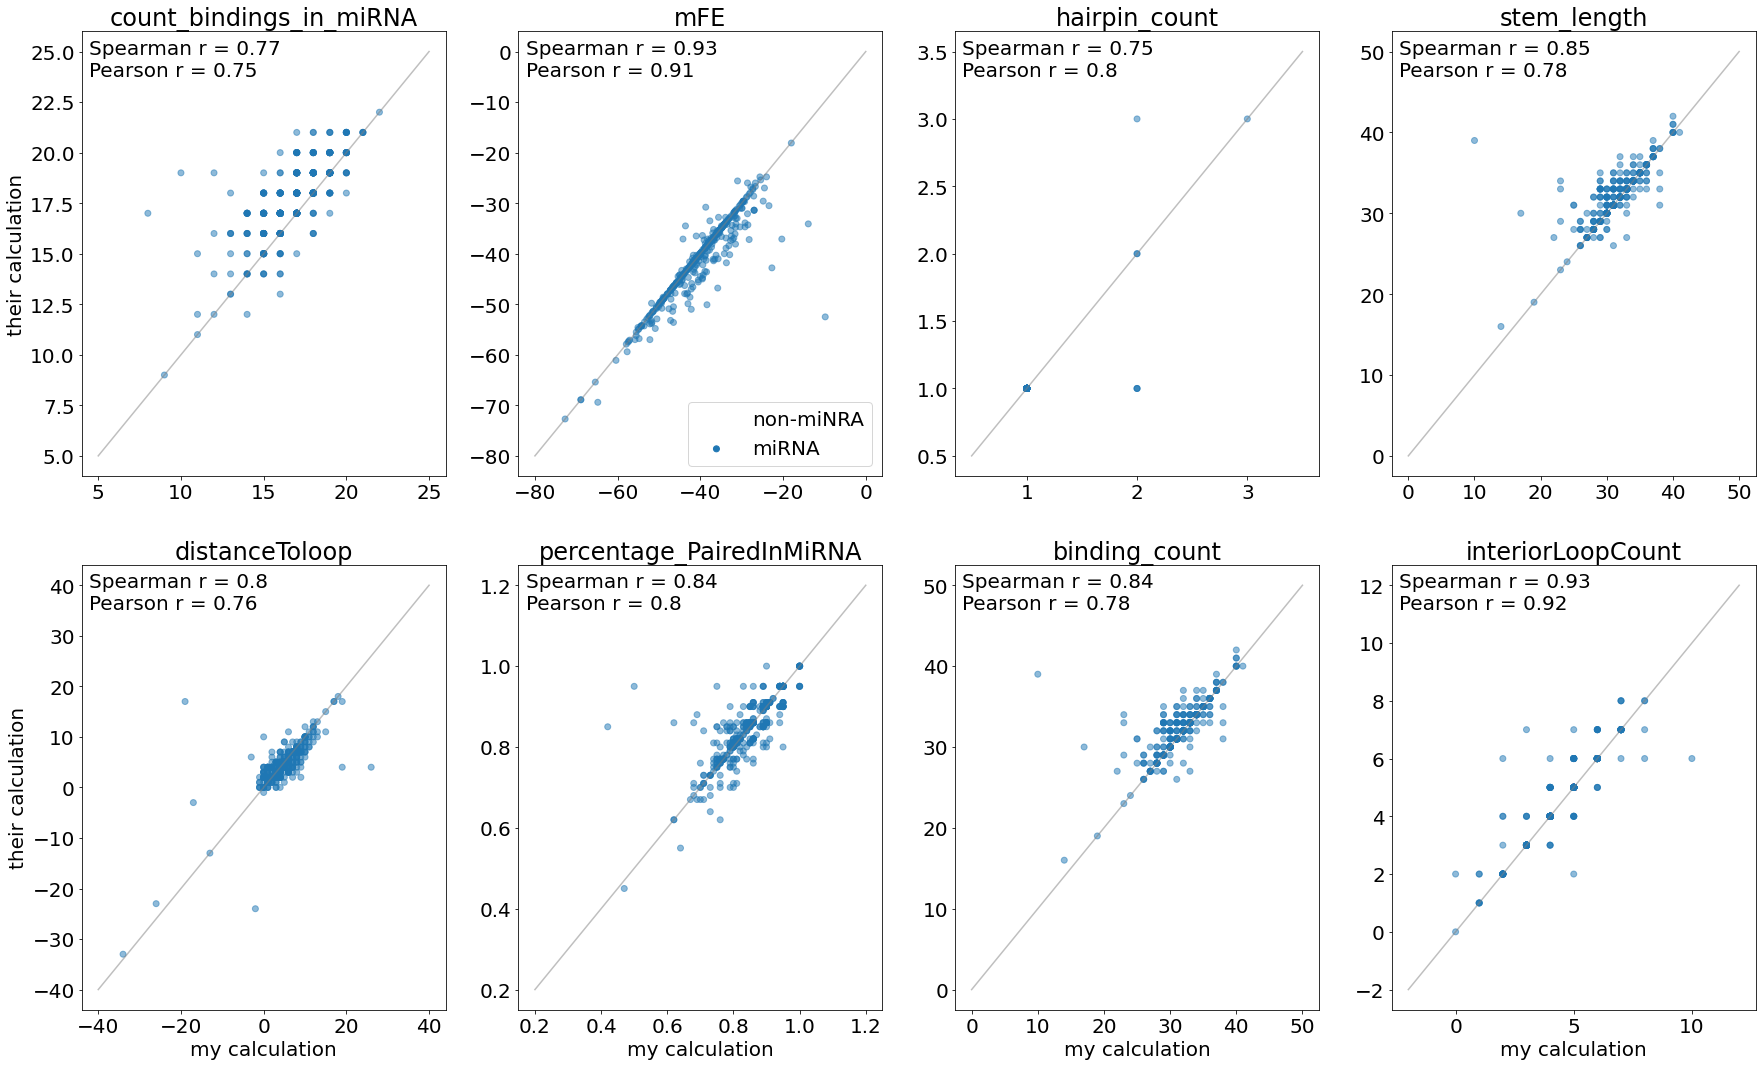

In [21]:
fig, axes = plt.subplots(2, 4, figsize = (30, 18))
label_colors = {1: 'tab:blue', -1:'tab:orange'}
scatter_labels = {1 : 'miRNA', -1:'non-miNRA'}
for i, ax in enumerate(axes.flatten()):
    for label in [-1, 1]:
        ldf = plot_df[plot_df['realMicRNA'] == label]
        ax.scatter(ldf[features[i] + '_mine'], ldf[features[i] + '_theirs'], alpha = 0.5, color=[label_colors[label] for label in ldf['realMicRNA']], label=scatter_labels[label])
        ax.set_title(features[i])
    if i in range(4, 8):
        ax.set_xlabel('my calculation')
    if i in [0, 4]:
        ax.set_ylabel('their calculation')
    ax.set_title(features[i])
    correlation_text = "Spearman r = {Spearman}\nPearson r = {Pearson}".format(Spearman=round(stats.spearmanr(plot_df[features[i] + '_mine'], plot_df[features[i] + '_theirs']).correlation, 2), 
                                                                               Pearson=round(stats.pearsonr(plot_df[features[i] + '_mine'], plot_df[features[i] + '_theirs'])[0], 2))
    ax.text(.02, .9, correlation_text, size=20, transform=ax.transAxes)
    if i == 1:
        leg = ax.legend(loc='lower right')
        for lh in leg.legendHandles: 
            lh.set_alpha(1)
    ax.plot(ax.get_xticks(), ax.get_xticks(), color='grey', alpha=0.5)

# we're closing in-- let's read in chrSeqDic 

In [1]:
import json

In [2]:
with open('file.txt', 'r') as csd_file:
    chr_seq_dic = json.load(csd_file)

In [3]:
type(chr_seq_dic)

dict

In [4]:
type(chr_seq_dic.items())

dict_items

In [10]:
print(take(1, chr_seq_dic.items()))

[('chrUn_KI270748v1', 'GATCCTTTGGAGGAGAAGAGGCGTTCTGGTTTTTGGAATTTTCAGCCTTTTTGCTCTGGTTTCTCTCCATCTTCATGGATTTATCTACCTGTGGTTTCTGATGTTGGTGACCTTCTGATGGGGTCACTGAGTGGCTGTCCTTTTTGTTGATGTTGATGCTATTCCTTTTTGTTTGTTAGTTTTCCTTCTAACAGTCAGGCCCCTCTGCTGCAGGTCTGTTGGGGTTTGCCCTAGGTCTACTCTAGACCCTGTTTGCCTGGGTATCACCAGCAGAGGCTGGAGAACAGCCAAGATTGCTGCCTGTTTCTTCCTCTGGAAGTTTTGTCCCAGAGGGGCACCCACCAGATGCCAGCCAGAGCTCTCCTGTATGAGGTGCCTGTTGGCACCTACTGGGAGGTGTCTCCCAGTCAGGATACACGGGGGTCAGGGACCCACTTGAGGAGGCAGTCTGACCCTTATCAGAGCTCGAATACTGTGCTGGGAGATCTGCTGCTCTCTTCAGAGCCATCAGGCTTTTCAAAGATGCTTTAAGTCTGCTGAAGCTGTGCCCACAGCCGCCCTTTCCCCTAGGTGCTCTGTTCCAGGGAGATGGGGGTTTTATCTATAGGTCTCTGACTGGGGCTGCTGCCCTTTTTTCAGAGATGCCTTGCCCAGAGAGGAGAAATCTAGAGAGGCAGTCTGGCTGCTGTGGCCTTGCTGAGTTGTGGTGGGCTCCACCCAGTTCAAACTTTCTGGTGGCTTTGTTTACACAGTGGGGGTAAAACTGCCTACTCAAGCCTTGGCAATGTGGAAGCCCCTCCCCCCACCAAGCTCTAGTGTCCTAGGTCAACCTCAGACTGCTGTGCAAGAATTTCAAGCCAGTGGATCTTAGCTTGCTGGGCTCTGTAGGGGTGGGACCCGCCGAGCCAGACCACTTGGCTCCCTGGCTTCAGCCCCCTTTCCAGGAGAGAGAATGGTTCTGTCTTGTTGGCATTCCA

In [6]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

# 10 June we are so close!

In [85]:
pd.read_csv('proxy_feature_df.tsv', sep='\t')['clusterName']

0      mapped_mirna_SRR333680:miRCluster_1868_24:chr1...
1      mapped_mirna_ERR973611:miRCluster_4323_20:chr1...
2      mapped_mirna_SRR837842:miRCluster_2950_24:chr7...
3      mapped_mirna_SRR372650:miRCluster_1762_24:chr7...
4      mapped_mirna_SRR837842:miRCluster_2249_25:chr5...
                             ...                        
873    mapped_nonMirna_SRR553576:miRCluster_4293_17:c...
874    mapped_nonMirna_SRR1635903:miRCluster_23739_23...
875    mapped_nonMirna_SRR837839:miRCluster_7509_16:c...
876    mapped_nonMirna_SRR1635908:miRCluster_1563_24:...
877    mapped_nonMirna_ERR409900:miRCluster_28769_28:...
Name: clusterName, Length: 878, dtype: object

# 13 June maybe not so close... 

In [11]:
proxy_df = pd.read_csv('proxy_feature_df.tsv', sep='\t')

In [13]:
strands = [cn[-1] for cn in proxy_df['clusterName'].values]

In [16]:
[(strand, strands.count(strand)) for strand in set(strands)]

[('-', 385), ('+', 493)]

# So we need to write miRNA sequences taking reverse complement when indicated by the cluster Name. Then generate a proxy feature df and feed that in. 

In [61]:
df = pd.read_csv('one_cluster_per_annotation_labeled_with_correct_seq_length_June_13.csv').drop('Unnamed: 0.1', axis=1)

In [62]:
df['miRNA_seq']

0          CCAGTGGTTTTACCCTATGGTAGG
1              GTGCATTGCTGTTGCATTGC
2          GTTTTTCATTATTGCTCCTGACCT
3          TCCCTGTCCTCCAGGAGCTCACGT
4         ATAAAGCTAGATAACCGAAAGTAAA
                   ...             
873               AAGTGAATGATTAGAGG
874         TCTTGGGGGACAGGGCTGGCCCA
875                GGGAGAGAAGGGTCGG
876        GTGTGTGTGGAGAGGAGAGGACCT
877    AGACTACTGCCAGACTGAGAAACCCAGA
Name: miRNA_seq, Length: 878, dtype: object

# Now, how does the feature file itself get written? 

In [86]:
mss = pd.read_csv('output_dir/miRge.2022-04-26_10-52-26/unmapped_tmp/SRR772403_modified_selected_sorted.tsv', sep='\t', header=None)

In [88]:
mss[5].values

array(['SRR772403:miRCluster_100_22:chr9:95086064_95086085+',
       'SRR772403:miRCluster_100_22:chr9:95086064_95086085+',
       'SRR772403:miRCluster_100_22:chr9:95086064_95086085+', ...,
       'SRR772403:miRCluster_9_20:chr1:116671787_116671806+',
       'SRR772403:miRCluster_9_20:chr1:116671787_116671806+',
       'SRR772403:miRCluster_9_20:chr1:116671787_116671806+'],
      dtype=object)

In [91]:
len(mss[3].values[0])

22

In [92]:
mss

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,mir1340_2,2,GGCTCAGTTCAGCAGGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,19M,*,0,0,GGCTCAGTTCAGCAGGAAC,IIIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:19,NM:i:0,XM:i:2
1,mir15006_2,2,TGGCTCAGTTCAGAAGGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,16M,*,0,0,GGCTCAGTTCAGAAGG,IIIIIIIIIIIIIIII,XA:i:1,MD:Z:12C3,NM:i:1,XM:i:2
2,mir16502_7,7,TGGCTCAGTTCAGCATGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,16M,*,0,0,GGCTCAGTTCAGCATG,IIIIIIIIIIIIIIII,XA:i:1,MD:Z:14G1,NM:i:1,XM:i:2
3,mir2495_20,20,TGGCTCATTTCAGCAGGAAC,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,2,255,16M,*,0,0,GGCTCATTTCAGCAGG,IIIIIIIIIIIIIIII,XA:i:1,MD:Z:6G9,NM:i:1,XM:i:2
4,mir2891_11,11,TGGCTCAGTTCAGCAGGAACA,TGGCTCAGTTCAGCAGGAACAG,0,SRR772403:miRCluster_100_22:chr9:95086064_9508...,1,255,21M,*,0,0,TGGCTCAGTTCAGCAGGAACA,IIIIIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:21,NM:i:0,XM:i:2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,mir1122_10,10,AAAAGCTGGGTTGAGAGGGCGAA,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,19M,*,0,0,AAAGCTGGGTTGAGAGGGC,IIIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:19,NM:i:0,XM:i:2
2691,mir1589_19,19,AAAAGCTGGGTTGAGAGGGCGA,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,18M,*,0,0,AAAGCTGGGTTGAGAGGG,IIIIIIIIIIIIIIIIII,XA:i:0,MD:Z:18,NM:i:0,XM:i:2
2692,mir4585_2,2,AAAAGCTTGGTTGAGAGGGCGA,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,18M,*,0,0,AAAGCTTGGTTGAGAGGG,IIIIIIIIIIIIIIIIII,XA:i:1,MD:Z:6G11,NM:i:1,XM:i:2
2693,mir5951_6,6,AAAAGCTGGGTTGAGAGGGCG,AAAAGCTGGGTTGAGAGGGC,0,SRR772403:miRCluster_9_20:chr1:116671787_11667...,2,255,17M,*,0,0,AAAGCTGGGTTGAGAGG,IIIIIIIIIIIIIIIII,XA:i:0,MD:Z:17,NM:i:0,XM:i:2


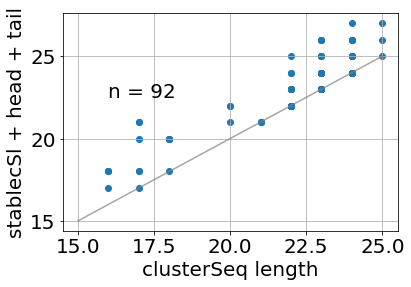

In [138]:
plt.scatter([len(seq) for seq in feature_df['clusterSeq']], feature_df['putative_length'])
plt.plot([15, 25], [15, 25], color='grey', alpha=0.7)
plt.xlabel('clusterSeq length')
plt.ylabel('stablecSl + head + tail');
plt.text(x = 16, y = 22.5, s = 'n = 92')
plt.grid()

In [137]:
def get_putative_length(row):
    row['putative_length'] = len(row['stableClusterSeq']) + row['headUnstableLength'] + row['tailUnstableLength'] 
    return row

feature_df = feature_df.apply(get_putative_length, axis=1)

(array([ 12.,   6.,  31.,  36., 124.,  89., 131., 183., 219.,  31.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

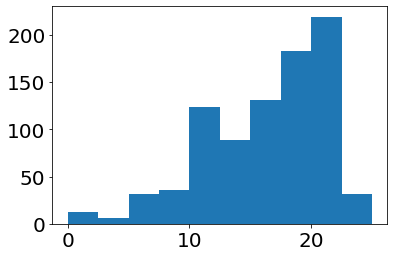

In [110]:
working_features.groupby('count_bindings_in_miRNA').count();
plt.hist(working_features['count_bindings_in_miRNA'])

# 13 June read in their intermediate feature files to access stable cluster Seq, not Cluster Seq, and produce a proxy_stable_feature_df from that. 

In [117]:
dataset_15s = glob.glob('/Users/jfernand/Downloads/juancarlosfdc_PL15/*.csv')
dfs = []
for ds15 in dataset_15s:
    df = pd.read_csv(ds15)
    dfs.append(df)
ds15 = pd.concat(dfs)

Sadly, this df doesn't have stableClusterSeq, but it does have headUnstableLength and tailUnstableLength, so let's merge this with our proxy feature df and go from there. 

In [124]:
[col for col in ds15.columns if 'len' in col]

['stem_length']

In [143]:
ds15['headUnstableLength'].mean()

2.7593555242827192

In [145]:
ds15['tailUnstableLength'].mean()

3.363781268847468

In [151]:
ds15[ds15['clusterName'].isin(one_cluster_per_ann['clusterName'])]

,realMicRNA,realMicRNAName,clusterName,adjustedClusterSeq,clusterSecondSeq,templateSeq,seqCount,readCountSum,exactMatchRatio,headUnstableLength,...,percentage_PairedInMiRNA,hairpin_count,binding_count,interiorLoopCount,apicalLoop_size,stem_length,mFE,count_bindings_in_miRNA,UGU_UGUG_motif,pair_state
123,1,hsa-miR-770-5p,mapped_mirna_SRR944034:miRCluster_989_24:chr14...,---TCCAGTACCACGTGTCAGGGCCAC--,-----CAGTACCACGTGTCAGG-------,GCCTCCAGTACCACGTGTCAGGGCCACAT,33,460,0.732609,0,...,0.85,1,35,6,6,35,-50.10,17,No,No
127,1,hsa-miR-431-5p,mapped_mirna_SRR944034:miRCluster_995_23:chr14...,---TGTCTTGCAGGCCGTCATGCAGG---,---TGNCTTGCAGGCCGTCATG-------,AGGTGTCTTGCAGGCCGTCATGCAGGCCA,43,3002,0.757162,0,...,0.90,1,29,3,7,29,-38.80,18,No,Yes
145,1,hsa-miR-380-5p,mapped_mirna_SRR944034:miRCluster_1015_22:chr1...,---ATGGTTGACCATAGAACATGCG------,---ATGGTTGACCATAGAACATGC-------,AAGATGGTTGACCATAGAACATGCGCTATCT,6,125,0.792000,0,...,0.77,1,30,5,4,30,-29.60,17,No,Yes
198,1,hsa-miR-541-5p,mapped_mirna_SRR944034:miRCluster_1072_24:chr1...,---AAAGGATTCTGCTGTCGGTCCCAC---,---AAAGGATTCTGCTGTCGGTC-------,GGGAAAGGATTCTGCTGTCGGTCCCACTCC,8,47,0.872340,0,...,0.62,1,33,5,3,33,-37.20,13,No,No
302,1,hsa-miR-518f-3p,mapped_mirna_SRR944034:miRCluster_1335_22:chr1...,---GAAAGCGCTTCTCTTTAGAGGA-----,---GANAGCGCTTCTCTTTAGAGGA-----,AAAGAAAGCGCTTCTCTTTAGAGGATTACT,5,24,0.791667,0,...,0.95,1,33,4,6,33,-42.90,20,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,-1,Null,mapped_nonMirna_SRR333680:miRCluster_12941_23:...,CAAAGTATTTGTTGGACGATTTA-----,CAAAGTATTTGTTGGACGATTT------,CAAAGTATTTGTTGGACGATTTATGTCT,5,12,1.000000,3,...,0.63,1,12,2,5,12,-5.50,12,No,No
1210,-1,Null,mapped_nonMirna_SRR333680:miRCluster_15447_21:...,---AGGCTGTGAGAAACGCGGGGT----,---AGGCTGTGAGAAACGCGGGG-----,TGCAGGCTGTGAGAAACGCGGGGTCGCG,3,12,1.000000,0,...,0.74,1,22,4,4,22,-26.30,14,No,No
1747,-1,Null,mapped_nonMirna_SRR333680:miRCluster_4870_29:c...,AGCAGCCGGGCTGAGAGGAGCGTGGCTGT-,----GCCGGGCTGAGAGGAGCGTG------,AGCAGCCGGGCTGAGAGGAGCGTGGCTGTC,10,32,1.000000,6,...,0.83,1,26,6,4,26,-33.40,15,No,No
1974,-1,Null,mapped_nonMirna_SRR333680:miRCluster_7149_23:c...,--CTGGAGAAGAGCTACGAGCTGCC----,---TGGAGAAGAGCTACGAGCTGCC----,CCCTGGAGAAGAGCTACGAGCTGCCTGAC,4,12,1.000000,1,...,0.80,2,34,7,8,34,-32.20,16,No,No


0      mapped_mirna_SRR333680:miRCluster_1868_24:chr1...
1      mapped_mirna_ERR973611:miRCluster_4323_20:chr1...
2      mapped_mirna_SRR837842:miRCluster_2950_24:chr7...
3      mapped_mirna_SRR372650:miRCluster_1762_24:chr7...
4      mapped_mirna_SRR837842:miRCluster_2249_25:chr5...
                             ...                        
873    mapped_nonMirna_SRR553576:miRCluster_4293_17:c...
874    mapped_nonMirna_SRR1635903:miRCluster_23739_23...
875    mapped_nonMirna_SRR837839:miRCluster_7509_16:c...
876    mapped_nonMirna_SRR1635908:miRCluster_1563_24:...
877    mapped_nonMirna_ERR409900:miRCluster_28769_28:...
Name: clusterName, Length: 878, dtype: object

In [152]:
df = pd.read_csv('one_cluster_per_annotation_labeled_with_correct_seq_length_June_13.csv').drop('Unnamed: 0.1', axis=1)

In [153]:
df['headUnstableLength']

0      1
1      0
2      1
3      0
4      1
      ..
873    2
874    6
875    1
876    3
877    5
Name: headUnstableLength, Length: 878, dtype: int64

In [164]:
final_june_13 = df.merge(ds15[['clusterName', 'tailUnstableLength']], how='left', on='clusterName')

In [165]:
final_june_13['miRNA_seq']

0          CCAGTGGTTTTACCCTATGGTAGG
1              GTGCATTGCTGTTGCATTGC
2          GTTTTTCATTATTGCTCCTGACCT
3          TCCCTGTCCTCCAGGAGCTCACGT
4         ATAAAGCTAGATAACCGAAAGTAAA
                   ...             
873               AAGTGAATGATTAGAGG
874         TCTTGGGGGACAGGGCTGGCCCA
875                GGGAGAGAAGGGTCGG
876        GTGTGTGTGGAGAGGAGAGGACCT
877    AGACTACTGCCAGACTGAGAAACCCAGA
Name: miRNA_seq, Length: 878, dtype: object

In [175]:
def adjust_to_stable_length(row):
    miRNA_seq = row['miRNA_seq'] 
    if row['strand'] == '+':
        row['stable_miRNA_seq'] = miRNA_seq[row['headUnstableLength']:len(miRNA_seq) -row['tailUnstableLength']]
    else:
        row['stable_miRNA_seq'] = miRNA_seq[row['tailUnstableLength']:len(miRNA_seq) -row['headUnstableLength']]
    return row
final_june_13 = final_june_13.apply(adjust_to_stable_length, axis=1)

In [177]:
final_june_13.head()[['miRNA_seq', 'stable_miRNA_seq', 'headUnstableLength', 'tailUnstableLength', 'strand']]

,miRNA_seq,stable_miRNA_seq,headUnstableLength,tailUnstableLength,strand
0,CCAGTGGTTTTACCCTATGGTAGG,CAGTGGTTTTACCCTATGGT,1,3,+
1,GTGCATTGCTGTTGCATTGC,GCATTGCTGTTGCATTGC,0,2,-
2,GTTTTTCATTATTGCTCCTGACCT,TTTTTCATTATTGCTCCTGAC,1,2,+
3,TCCCTGTCCTCCAGGAGCTCACGT,CTGTCCTCCAGGAGCTCACGT,0,3,-
4,ATAAAGCTAGATAACCGAAAGTAAA,AAGCTAGATAACCGAAAGTAA,1,3,-
